In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/isbn13.csv')
data=pd.DataFrame(data)
data[:2]

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_year,publisher,Unnamed: 10
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,eng,652,2095690,27591,2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,eng,870,2153167,29221,2004,Scholastic Inc.,NaN


In [3]:
data.shape

(11123, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   language_code       11123 non-null  object 
 5   num_pages           11123 non-null  int64  
 6   ratings_count       11123 non-null  int64  
 7   text_reviews_count  11123 non-null  int64  
 8   publication_year    11123 non-null  int64  
 9   publisher           11123 non-null  object 
 10  Unnamed: 10         0 non-null      float64
dtypes: float64(2), int64(5), object(4)
memory usage: 956.0+ KB


In [5]:
data.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
language_code             0
num_pages                 0
ratings_count             0
text_reviews_count        0
publication_year          0
publisher                 0
Unnamed: 10           11123
dtype: int64

In [6]:
data.describe()

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,Unnamed: 10
count,11123.000000,11123.000000,11123.000000,1.112300e+04,11123.000000,11123.000000,0.0
mean,5562.000000,3.934075,336.405556,1.794285e+04,542.048099,2000.169019,NaN
std,3211.077856,0.350485,241.152626,1.124992e+05,2576.619589,8.247227,NaN
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1900.000000,NaN
25%,2781.500000,3.770000,192.000000,1.040000e+02,9.000000,1998.000000,NaN
50%,5562.000000,3.960000,299.000000,7.450000e+02,47.000000,2003.000000,NaN
75%,8342.500000,4.140000,416.000000,5.000500e+03,238.000000,2005.000000,NaN
max,11123.000000,5.000000,6576.000000,4.597666e+06,94265.000000,2020.000000,NaN


In [7]:
data[data['ratings_count']>1000000].count() #no of books who have been rated by more than 100,000 readers

bookID                30
title                 30
authors               30
average_rating        30
language_code         30
num_pages             30
ratings_count         30
text_reviews_count    30
publication_year      30
publisher             30
Unnamed: 10            0
dtype: int64

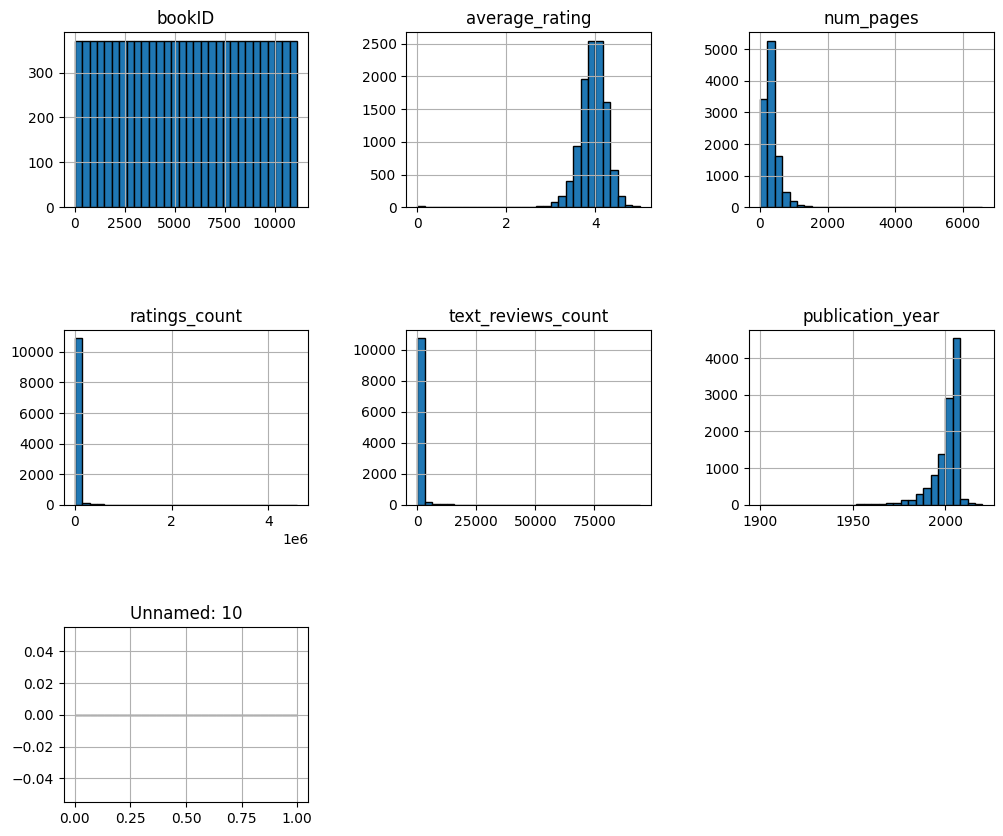

In [8]:
data.hist(figsize=(12,10),bins=30,edgecolor="black")
plt.subplots_adjust(hspace=0.7,wspace=0.4)

In [9]:
top_30=data[data['ratings_count']>1000000]
top_30.sort_values(by='average_rating',ascending=False,inplace=True)
top_30.head(2)

<ipython-input-9-06ae848832e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_30.sort_values(by='average_rating',ascending=False,inplace=True)


,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_year,publisher,Unnamed: 10
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,eng,652,2095690,27591,2006,Scholastic Inc.,NaN
3,4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,eng,435,2339585,36325,2004,Scholastic Inc.,NaN


<Axes: xlabel='average_rating', ylabel='title'>

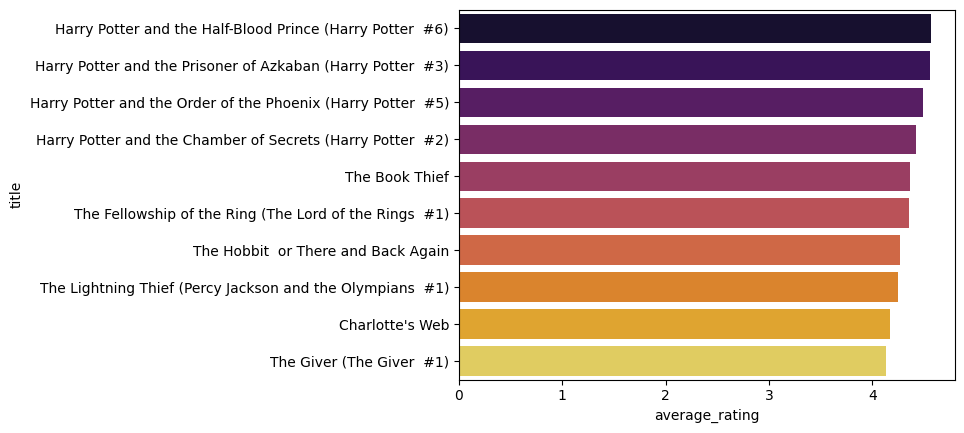

In [10]:
sns.barplot(x='average_rating',y='title',data=top_30.head(10),palette='inferno')

<Axes: xlabel='title', ylabel='authors'>

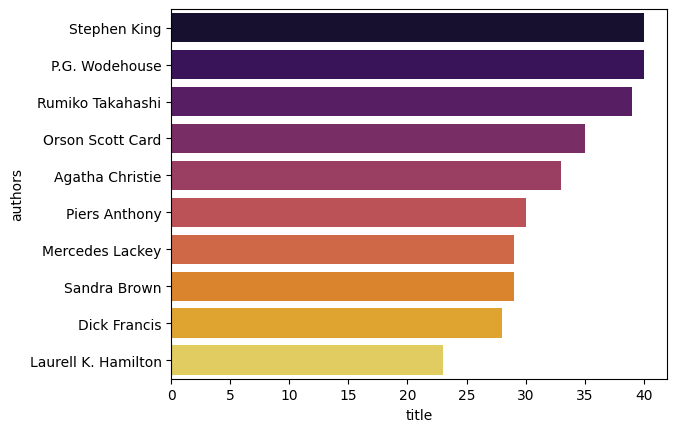

In [11]:
#most_books= Top ten authors who have written most no of books('title') in the data
most_books = data.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
sns.barplot(x=most_books['title'],y=most_books.index,data=most_books,palette='inferno')

<Axes: xlabel='ratings_count', ylabel='title'>

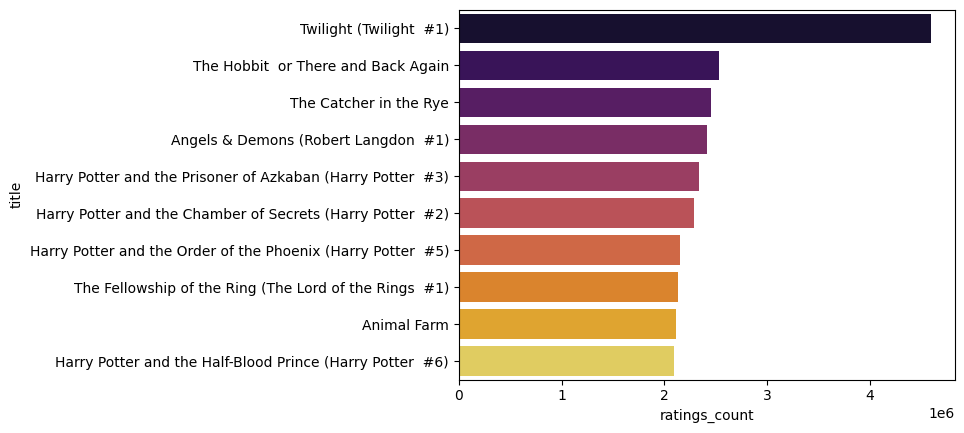

In [12]:
most_rated = data.sort_values('ratings_count', ascending = False).head(10).set_index('title')
sns.barplot(x=most_rated['ratings_count'], y=most_rated.index,data=most_rated, palette = 'inferno')

<Axes: xlabel='text_reviews_count', ylabel='title'>

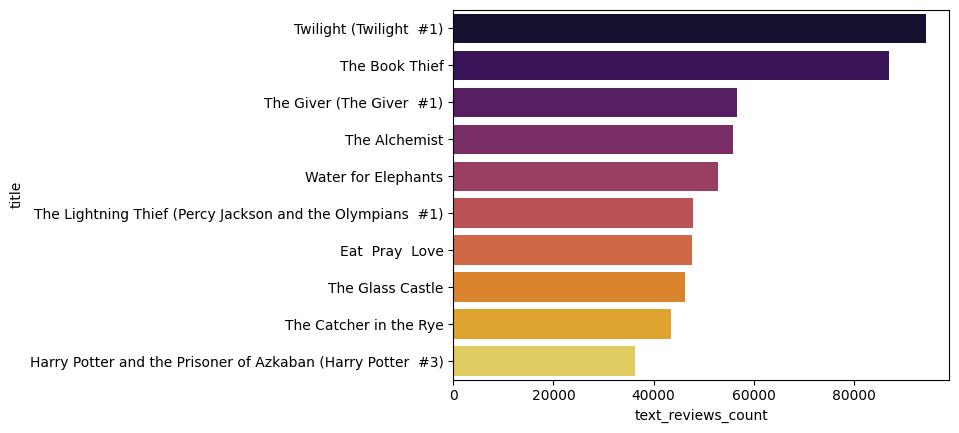

In [13]:
most_reviewed = data.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')
sns.barplot(x=most_reviewed['text_reviews_count'], y=most_reviewed.index,data=most_reviewed, palette = 'inferno')

In [14]:
round(data.corr(),2)

<ipython-input-14-9164483f6b5a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(data.corr(),2)


,bookID,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,Unnamed: 10
bookID,1.00,-0.03,-0.03,-0.08,-0.08,0.03,NaN
average_rating,-0.03,1.00,0.15,0.04,0.03,-0.03,NaN
num_pages,-0.03,0.15,1.00,0.03,0.04,-0.02,NaN
ratings_count,-0.08,0.04,0.03,1.00,0.87,0.04,NaN
text_reviews_count,-0.08,0.03,0.04,0.87,1.00,0.07,NaN
publication_year,0.03,-0.03,-0.02,0.04,0.07,1.00,NaN
Unnamed: 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

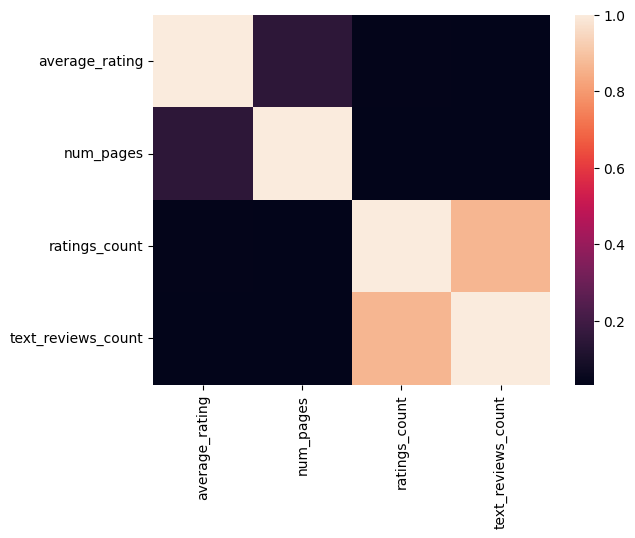

In [15]:
cormat = data[['average_rating','num_pages','ratings_count','text_reviews_count']].corr()
round(cormat,2)
sns.heatmap(cormat)
#corr of ratings_count and text_reviews_count have high corelation
#corr of average_ratinga and num_pages is high: direct relationship

Data Preprocessing

In [16]:
data1=data.copy()
data1=pd.DataFrame(data1)
data1[:2]

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_year,publisher,Unnamed: 10
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,eng,652,2095690,27591,2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,eng,870,2153167,29221,2004,Scholastic Inc.,NaN


In [17]:
data1.drop(['Unnamed: 10'],axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [19]:
#data2_1 is the version with dummies for all categorical variables
data2_1=pd.get_dummies(data1,columns=['title','authors','language_code','publisher'])
data2_1=pd.DataFrame(data2_1)
data2_1[:2]

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,title_ said the shotgun to the head.,title_$30 Film School: How to Write Direct Produce Shoot Edit Distribute Tour With and Sell Your Own No-Budget Digital Movie,title_'Salem's Lot,title_1 000 Places to See Before You Die,...,publisher_å°å­¦é¤¨,publisher_å°å­¦é¤¨ [ShoÌ„gakukan],publisher_æ±ç«‹,publisher_æ™‚å ±å‡ºç‰ˆ,publisher_çš‡å† æ–‡åŒ–å‡ºç‰ˆæœ‰é™å…¬å¸,publisher_è¯ç¶“å‡ºç‰ˆäº‹æ¥­è‚¡ä»½æœ‰é™å…¬å¸,publisher_è§’å·æ›¸åº— (Kadokawa Shoten),publisher_è¬›è«‡ç¤¾,publisher_è‹±æ–‡æ¼¢è²å‡ºç‰ˆè‚¡ä»½æœ‰é™å…¬å¸,publisher_é›†è‹±ç¤¾
0,1,4.57,652,2095690,27591,2006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,4.49,870,2153167,29221,2004,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data2_1.shape

(11123, 19310)

In [21]:
#data2 is the scaled version of data1 that will be used as features
ct=ColumnTransformer([('scaler',MinMaxScaler(),[2,3,4,5,6])],remainder='passthrough')
data2=ct.fit_transform(data2_1)
data2=pd.DataFrame(data2, columns=data2_1.columns)
data2[:2]

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,title_ said the shotgun to the head.,title_$30 Film School: How to Write Direct Produce Shoot Edit Distribute Tour With and Sell Your Own No-Budget Digital Movie,title_'Salem's Lot,title_1 000 Places to See Before You Die,...,publisher_å°å­¦é¤¨,publisher_å°å­¦é¤¨ [ShoÌ„gakukan],publisher_æ±ç«‹,publisher_æ™‚å ±å‡ºç‰ˆ,publisher_çš‡å† æ–‡åŒ–å‡ºç‰ˆæœ‰é™å…¬å¸,publisher_è¯ç¶“å‡ºç‰ˆäº‹æ¥­è‚¡ä»½æœ‰é™å…¬å¸,publisher_è§’å·æ›¸åº— (Kadokawa Shoten),publisher_è¬›è«‡ç¤¾,publisher_è‹±æ–‡æ¼¢è²å‡ºç‰ˆè‚¡ä»½æœ‰é™å…¬å¸,publisher_é›†è‹±ç¤¾
0,0.099148,0.455816,0.292696,0.883333,0.0,1.0,4.57,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.132299,0.468317,0.309988,0.866667,0.0,2.0,4.49,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Recommender

In [22]:
from sklearn.neighbors import NearestNeighbors

In [42]:
book_name=input('Please enter the name of your favorite book: ')
n=int(input('Please enter number of recommendations: '))

Please enter the name of your favorite book: Harry Potter and the Order of the Phoenix (Harry Potter  #5)
Please enter number of recommendations: 6


In [43]:
def book_recommender(book_name,n):
  model = NearestNeighbors(n_neighbors=n+1,algorithm='kd_tree')
  model.fit(data2)
  idlist = model.kneighbors(data2,return_distance=False)

  book_list1=[]
  book_id=data1[data1['title']==book_name].index
  book_id=book_id[0]
  for i in idlist[book_id]:
    book_list1.append(data1.iloc[i].title)
  book_list=book_list1[1:]
  return book_list

In [44]:
book_recommender(book_name,n)

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)',
 'Unauthorized Harry Potter Book Seven News: "Half-Blood Prince" Analysis and Speculation',
 'Harry Potter Collection (Harry Potter  #1-6)']